# RECOVERY OF INTELLIGENT SYSTEMS

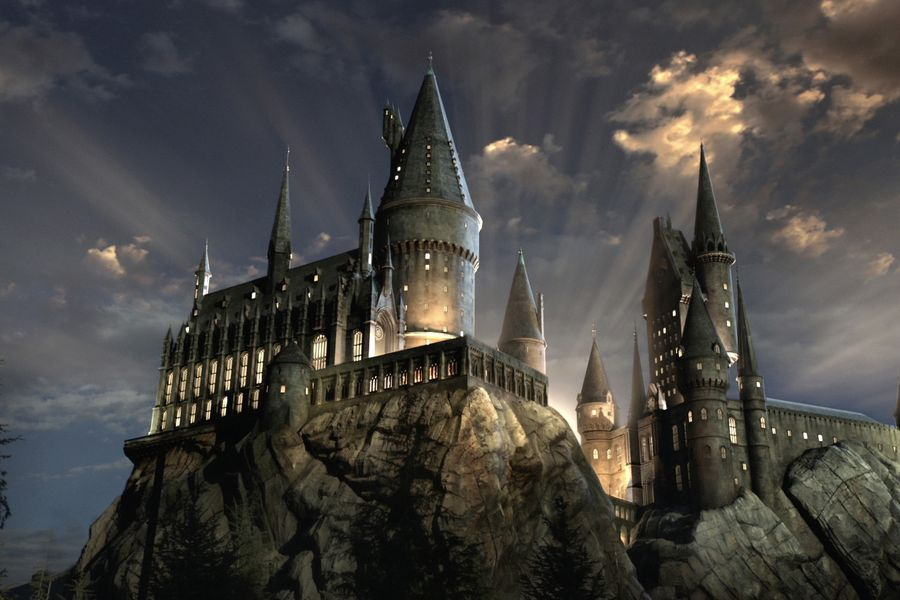

# NAMES 📋
* Juan Luis Canedo Villarroel

# ABOUT THE PRACTICE
Harry Potter wants to rescue his godfather Sirius from Azkaban prison but to do so he has to cross a road that has strong winds.
To do so he has to cross a road that has strong winds. Help him by building an intelligent agent using
reinforcement learning to get from the initial state where Harry (S) is to the terminal state where Sirius (G) is.
is Sirius (G).

The world is a board with 9 columns and 7 rows. Harry is in position (1,1) and Sirius is in position (7,4).
You know that in columns 3(or letter A), 4(B) and 5(C) there are strong winds coming from south to north. With a
probability P ra = 0.2 you could end up one box to the north in column A, with probability P rb = 0.3.
you could end up two squares north in column B and with probability P rc = 0.25 you could end up one square north in column C. With probability P rc = 0.25 you could end up one square north in column C.
north in column C as long as you don't leave the map. That is, if Harry is in the
position (2,1) and executes the action to advance to the East, he could end up with probability P ra in the square (3,0)
and with probability 1-P ra in the square (3,1).
Find an optimal policy for each of the states using the Q-learning algorithm.


## A LITTLE BIT OF DEFINITIONS

## HOW TO FIND OPTIMAL POLICIES
If a policy is better or equal to another if only its expected return is greater than or equal to the expected return of another policy.

## OPTIMAL POLICIES
If a policie is greater or equal to another policie taking into account the restriction that if and only if the value of the policie in a state s is greater or equal to the value of the other policie in the same state for all states. 

## Q-LEARNING
A technique used to find an optimal policy such that the expected return is the maximum possible. 


## DEFINING INTELLIGENT AGENT
## REPRESENTATIONS
## DEFINING INTELLIGENT AGENT
## REPRESENTATIONS
* Space available for walking
* S : Initial state of the agent
* G : Target or final state to be reached
* O: Winds that make you take only one step to the north of your original direction with a probability of 0.2
* I : Winds that make you take two steps north of your original direction with a probability of 0.3
* 0 : Winds that make you take one step to the north of your original direction with a probability of 0.25


### PROBLEM REPRESENTATION (DISCRETE) 
The problem is described as discrete because its variables are quantitative and are discrete. 

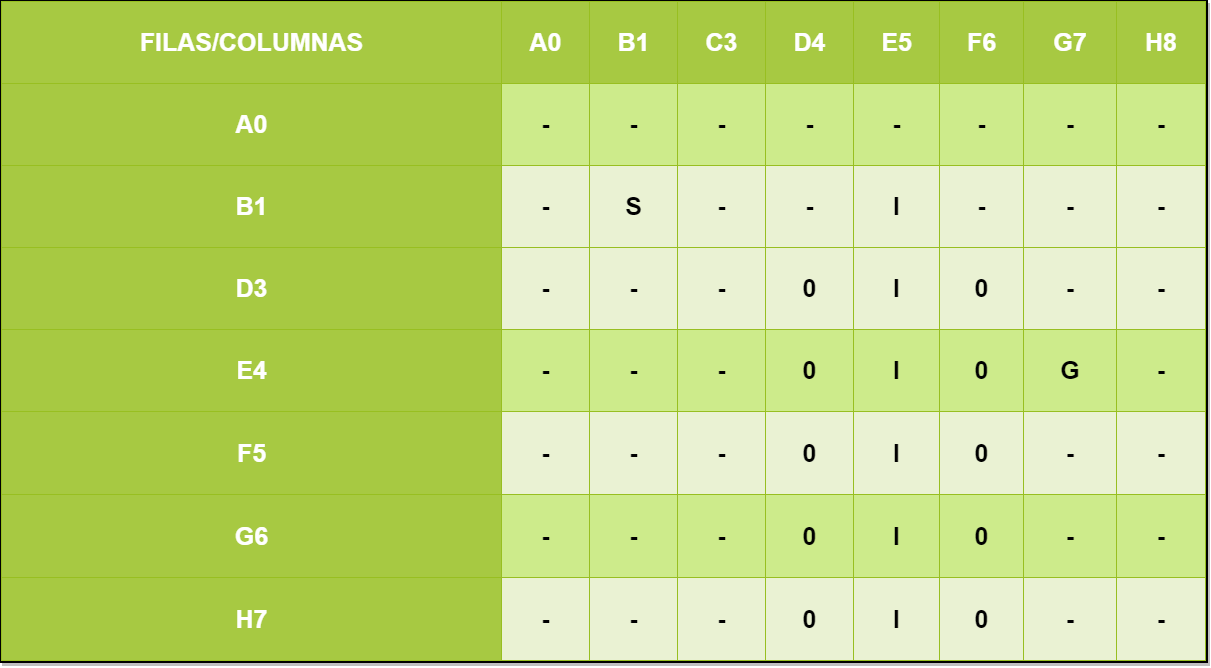

#### DISCLAIMERS 
For the definition of the intelligent agent it is possible to use the matrix positions with the following formats letter+number, column or row number or only letters, but in the development of the agent the value of each cell with the two numerical positions will be used

The jump actions in x, y and z basically do the same, so it is generalized to a jump 0. 

## ACTIONS
* 🢁 UP
* 🢃 DOWN
* 🢂 RIGHT
* 🢀 LEFT
* -1 ONE STEP
* -2 TWO STEPS

# STATES
* START S (1 1)
                 - (2 1)
                 - (3 1)
                 - (4 1)
                 - (5 0)
                 ...
* GOAL G (7 4)

# REWARDS
The rewards are based on the fact that if you find the target you have +10, but as you only walk in the space of states you take off one point and two in case you are caught by a wind, because these winds make you jump only one position from the official direction in which you were going, they are evaluated quantitatively in the same way. 
* +10 : Goal g
* 0 : 0,i,O

# HOW WE WILL BUILD THE MAP 

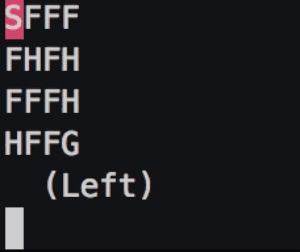

For the realization of the map we used the frozen lake resource which was explained in the class as a model of a map, we consulted a little more of this map in its documentation in github which could be easily modified to create a map very close to the one of the practice (https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py).

In [47]:
#we import basic libraries for mapping and processing
import sys
from contextlib import closing
import numpy as np
from io import StringIO
from gym import utils
from gym.envs.toy_text import discrete
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np
import copy

In [48]:
#We assign a numerical value to the actions already defined.
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
WINDS  =-1
STORMS=-2

In [49]:
#Creating Map
maps=[["-","-","-","0","I","O","-","-","-"],
      ["-","S","-","0","I","O","-","-","-"],
      ["-","-","-","0","I","O","-","-","-"],
      ["-","-","-","0","I","O","-","-","-"],
      ["-","-","-","0","I","O","-","G","-"],
      ["-","-","-","0","I","O","-","-","-"],
      ["-","-","-","0","I","O","-","-","-"]
     ]
def get_position(row,column):
    try:
        return maps[row][column]
    except:
        return False
        
get_position(4,7)


'G'

In [50]:
#Obtaining how many shares exist and how many possible states there would be
action_space_size = 4
state_space_size = 63
print(action_space_size,state_space_size) #should give 4 and 63 spaces state

4 63


In [16]:
#Initializing Parameters
#Initialize number of episodes
num_episodes = 15000 
#We define the number of steps per episode to be 100 because 
#at the beginning the agent is dumb and we try to stop the experiment if he does not 
#reach the hole or goal, i.e. if he does a lot of steaps he can go round and round. 
max_steps_per_episode = 100 
learning_rate = 0.2
discount_rate = 0.95
#List of rewards earned
rewards_avg = []
#State x stock matrix
q_table = np.zeros((state_space_size, action_space_size))


In [17]:
#Obteniendo probabilidades de vientos
prob_a=0.2
prob_b=0.3
prob_c=0.25

In [57]:
#Action to move the agent without going out of bounds 
#In this section of code the verifications are made if a state or its 
#positions are inside the board or inside the winds and also it is played 
#with the movement of the agent where if it falls in winds you get a random
#number in such a way that if it is less than the probability it will make it 
#make a jump depending on what type of wind it is in because one makes you make
#only one jump and another one makes you make two jumps.

#LEFT = 0
#DOWN = 1
#RIGHT = 2
#UP = 3

def is_inside(x,y):
    if(get_position(x,y)!=False):
        return True
    else:
        return False

def steps(step):
    if step=="0":
        return -1
    if step=="O":
        return -1
    if step=="I":
        return -2
    else:
        return step

def is_inside_winds(x,y):
    position=get_position(x,y)
    if(position=="0" or position=="O" or position=="I"):
        return True,position
    else:
        return False,position
    

    
def move(x,y,action): 
    if action == 3:
        x_aux=x
        y_aux=y-1
        if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
            new_x=x_aux
            new_y=y_aux
            result=is_inside_winds(new_x,new_y)
            if (result[0]==True and (new_x>0 and new_y>0)):
                    new_step=steps(result[1])
                    return move(new_x,new_y,new_step)    
        else:
            new_x=x
            new_y=y
    if action == 2:
        x_aux=x+1
        y_aux=y
        if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
            new_x=x_aux
            new_y=y_aux
        else:
            new_x=x
            new_y=y
    if action==1:
        x_aux=x
        y_aux=y+1
        if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
            new_x=x_aux
            new_y=y_aux
        else:
            new_x=x
            new_y=y
    if action==0:
        x_aux=x-1
        y_aux=y
        if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
            new_x=x_aux
            new_y=y_aux
        else:
            new_x=x
            new_y=y
            
    if action==-1:
        numb_random=random.uniform(0,1)
        if(numb_random<=prob_a or numb_random<=prob_c):
            x_aux=x
            y_aux=y-1
            if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
                new_x=x_aux
                new_y=y_aux
            else:
                new_x=x
                new_y=y
        else:
            return x,y

    if action==-2:
        numb_random=random.uniform(0,1)
        if(numb_random<=prob_b):
            x_aux=x
            y_aux=y-2
            if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
                new_x=x_aux
                new_y=y_aux
            else:
                x_aux=x
                y_aux=y-1
                if (is_inside(x_aux,y_aux)!=False and (x>0 and y>0)):
                    new_x=x_aux
                    new_y=y_aux
                else:
                    new_x=x
                    new_y=y
        else:
            return x,y
    return new_x,new_y


move(4,7,0)
move(3,7,0)
move(2,7,0)
move(1,7,0)
move(0,7,0)
move(0,7,0) 


(0, 7)

In [ ]:
#Running Q-Learning Algorithm 
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
for it in range(100):#Se corre 100 veces con 15000 episodios
    print('average ', it)
    rewards_all_episodes=[]#recolecta rewards por todos los episodios
    
    # exporation-exploitation trade-off params
    exploration_rate = 1 #epsilon
    max_exploration_rate = 1 #epsilon max
    min_exploration_rate = 0.01  #epsilon min
    exploration_decay_rate = 0.005 #epsilon delta
    
    # init q table in zeros
    #por cada experimento se reinicia el q table 
    q_table = np.zeros((state_space_size, action_space_size))

    # iterate over the episodes
    #Se itera por cada episodio
    for episode in range(num_episodes):
        #reseteando valores
        state=(1,1) #Posicion inicial vuelve a donde estaba
        goal=(4,7) #Posicion final igual
        state = env.reset() # resetea ambiente
        done = False #agoto numeros de steps o llego a estado terminal, entonces
        #termino
        rewards_current_episode = 0 # por cada paso que da el agente 
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) #explotar hace accion maxima
            else:
                action = env.action_space.sample() # Se toma accion aleatoriamente

            # Take action
            x,y=state
            new_state=move(x,y,action)
            if new_state = (4,7):
                reward=10
            else:
                reward=-1
            
        

            # Update Q-table for Q(s,a)
            # Se actualiza valores de q table
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            # transition next state
            # remplazamos nuevo estado
            state = new_state
            #reward se vaya sumando con nuevos estados
            rewards_current_episode += reward
            #si ha encontrado un el estado final o ya no tiene steps
            if done == True: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)


Drawing the number of episodes and the reward obtained in each one, 
this facilitates us to know the points where approximately a greater reward is obtained.

In [ ]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


Obtaining the value of the q table is fundamental for obtaining an optimal policy according to each state in which it is found, there can be more than two optimal policies, this is because in that state the result of executing any of the two actions would obtain the same reward.

In [ ]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)

In [ ]:
for episode in range(10):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state
        env.close()